# Project: Wrangling and Analyze Data

In this project, the WeRateDogs tweet data along with image predictions data downloaded from the internet will be wrangled __(gathered, assessed, and cleaned)__, and eventually analyzed to produce __3 insights and 2 visualizations__.

The data to be analyzed will be gathered from three different sources in different formats (.csv, .tsv, and .txt), and a total of 11 quality issues and 2 tidiness issues found in the datasets will be cleaned. Afterwards, the three individual datasets will be merged into a single clean master dataset.

## Data Gathering 

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#import the necessary libraries
import pandas as pd 
import numpy as np 
import requests 
import tweepy 
from tweepy import OAuthHandler
import json  

In [2]:
#load the content of the twitter archive csv file into a dataframe
weratedogs_df = pd.read_csv("twitter-archive-enhanced.csv") 

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#download the tsv file for image prediction
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv" 
response = requests.get(url) 

In [4]:
#write the downloaded content into a file
with open("image_predictions.tsv", mode = "wb") as file: 
    file.write(response.content)

In [3]:
#load the content of the file into a dataframe
image_predictions = pd.read_csv("image_predictions.tsv", sep = "\t") 


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
#Create an API object that can be used to gather Twitter data 
consumer_key = "CONSUMER_KEY"
consumer_secret = "CONSUMER_SECRET" 
access_token = "ACCESS_TOKEN"
access_secret = "ACCESS_SECRET" 



In [14]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 

auth.set_access_token(access_token, access_secret) 

api = tweepy.API(auth, wait_on_rate_limit = True) 

In [26]:
#get the tweet_ids from the weratedogs_df dataframe into a list 
tweet_ids = weratedogs_df["tweet_id"].values 

#open text file for the JSON objects to be obtained and write JSON object obtained for each tweet_id line by line into the opened file
with open("tweet-json.txt", mode = "w") as file: 
    dict_failed = {}
    for tweet_id in tweet_ids: 
        try: 
            tweet_data = api.get_status(tweet_id, tweet_mode = "extended") 
            json.dump(tweet_data._json, file) 
            file.write("\n") 
       
        except Exception as e: 
            dict_failed[tweet_id] = e 
            pass
            
print(dict_failed)    
    

{888202515573088257: NotFound('404 Not Found\n144 - No status found with that ID.'), 873697596434513921: NotFound('404 Not Found\n144 - No status found with that ID.'), 872668790621863937: NotFound('404 Not Found\n144 - No status found with that ID.'), 872261713294495745: NotFound('404 Not Found\n144 - No status found with that ID.'), 869988702071779329: NotFound('404 Not Found\n144 - No status found with that ID.'), 866816280283807744: NotFound('404 Not Found\n144 - No status found with that ID.'), 861769973181624320: NotFound('404 Not Found\n144 - No status found with that ID.'), 856602993587888130: NotFound('404 Not Found\n144 - No status found with that ID.'), 856330835276025856: NotFound('404 Not Found\n144 - No status found with that ID.'), 851953902622658560: NotFound('404 Not Found\n144 - No status found with that ID.'), 851861385021730816: NotFound('404 Not Found\n144 - No status found with that ID.'), 845459076796616705: NotFound('404 Not Found\n144 - No status found with tha

In [27]:
len(dict_failed)

29

In [4]:
#open the text file created and extract needed information
json_list = [] 
with open("tweet-json.txt", encoding = "utf-8") as f: 
    lines = f.readlines() 
    #print(lines[0]) 
    
    for line in lines: 
        line = json.loads(line)
        tweet_id = line["id_str"] 
        retweet_count = line["retweet_count"] 
        fav_count = line["favorite_count"] 
       
        
        #append to list of dictionary 
        json_list.append({"tweet_id" : tweet_id, 
                          "retweet_count" : retweet_count, 
                          "favorite_count" : fav_count})

In [5]:
#load json_list into a pandas DataFrame 
twitter_api = pd.DataFrame(json_list) 

## Assessing Data 

Here, the various datasets will be assessed for __11 quality and 2 tidiness issues, both visually and  programmatically__. 

#### Visual Assessment 

In [6]:
#visually assess the weratedogs DataFrame
weratedogs_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
#visually assess the image_predictions DataFrame
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
#visually assess the twitter_api DataFrame
twitter_api

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6979,33706
1,892177421306343426,5281,29242
2,891815181378084864,3466,21982
3,891689557279858688,7193,36786
4,891327558926688256,7723,35178
...,...,...,...
2322,666049248165822465,36,88
2323,666044226329800704,115,246
2324,666033412701032449,36,100
2325,666029285002620928,39,112


#### Programmatic Assessment 

__`weratedogs_df`__ 

In [9]:
#view random samples in the weratedogs DataFrame
weratedogs_df.sample(15)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1154,725458796924002305,NaN,NaN,2016-04-27 22:57:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pup had to be removed cuz it wouldn't have bee...,NaN,NaN,NaN,https://twitter.com/foxdeportes/status/7251360...,13,10,None,None,None,None,None
2163,669375718304980992,NaN,NaN,2015-11-25 04:43:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Billl. He's trying to be a ghost but h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669375718...,6,10,Billl,None,None,None,None
1979,672980819271634944,NaN,NaN,2015-12-05 03:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extraordinary dog here. Looks large. Just a he...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672980819...,5,10,None,None,None,None,None
1584,687096057537363968,NaN,NaN,2016-01-13 02:17:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper's New Year's resolution was to bec...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687096057...,11,10,None,None,None,pupper,None
1106,734787690684657664,NaN,NaN,2016-05-23 16:46:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog is more successful than I will ever b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/734787690...,13,10,None,None,None,None,None
1119,731285275100512256,NaN,NaN,2016-05-14 00:49:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Solomon. He's a Beneroo Cumberflop. 12...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731285275...,12,10,Solomon,None,None,None,None
1441,696877980375769088,NaN,NaN,2016-02-09 02:07:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Misty. She's in a predicament. Not sur...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696877980...,9,10,Misty,None,None,pupper,None
1588,686730991906516992,NaN,NaN,2016-01-12 02:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I just love this picture. 12/10 lovely af http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686730991...,12,10,None,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
795,773308824254029826,NaN,NaN,2016-09-06 23:56:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bungalo. She uses that face to get wha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773308824...,12,10,Bungalo,None,None,None,None


In [10]:
#obtain number of rows and columns of the weratedogs DataFrame
weratedogs_df.shape

(2356, 17)

In [11]:
#obtain general information about the weratedogs DataFrame
weratedogs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
#check for duplicate rows
weratedogs_df.duplicated().sum()

0

In [13]:
#check for duplicated tweet ids 
weratedogs_df.tweet_id.duplicated().sum()

0

In [14]:
#check for types of values and their numbers in doggo column
weratedogs_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [15]:
#check for types of values and their numbers in floofer column
weratedogs_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [16]:
#check for types of values and their numbers in pupper column
weratedogs_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [17]:
#check for types of values and their numbers in puppo column
weratedogs_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [18]:
#check for rows having doggo and pupper dog stages
weratedogs_df.query('doggo == "doggo" and pupper == "pupper"')


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


In [19]:
#check for rows having both doggo and puppo dog stages
weratedogs_df.query('doggo == "doggo" and puppo == "puppo"')


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


In [20]:
#check for rows having both doggo and floofer dog stages 
weratedogs_df.query('doggo == "doggo" and floofer == "floofer"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [21]:
#check for rows having both floofer and pupper dog stages 
weratedogs_df.query('floofer == "floofer" and pupper == "pupper"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [22]:
#check for rows having both floofer and puppo dog stages 
weratedogs_df.query('floofer == "floofer" and puppo == "puppo"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [23]:
#rows having both pupper and puppo dog stages
weratedogs_df.query('pupper == "pupper" and puppo == "puppo"')


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [24]:
#check for row with rating denominator greater than 10 
weratedogs_df.query('rating_denominator > 10') 


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


__`image_predictions`__ 

In [25]:
#view random samples of the image_predictions DataFrame 
image_predictions.sample(15)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1235,746507379341139972,https://pbs.twimg.com/media/Clwgf4bWgAAB15c.jpg,1,toy_poodle,0.508292,True,Lakeland_terrier,0.234458,True,affenpinscher,0.084563,True
953,705102439679201280,https://pbs.twimg.com/media/CckG63qUsAALbIr.jpg,1,collie,0.457672,True,chow,0.279101,True,Pomeranian,0.076922,True
780,689977555533848577,https://pbs.twimg.com/media/CZNK7NpWwAEAqUh.jpg,1,cowboy_hat,0.291081,False,Labrador_retriever,0.179625,True,sombrero,0.121493,False
1136,728760639972315136,https://pbs.twimg.com/media/Ch0T71OWMAA4yIw.jpg,1,Pembroke,0.939134,True,Cardigan,0.054336,True,Chihuahua,0.005590,True
562,677918531514703872,https://pbs.twimg.com/media/CWhzTbzWUAAEAUN.jpg,1,Eskimo_dog,0.199347,True,dalmatian,0.153225,True,American_Staffordshire_terrier,0.107798,True
2058,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True
19,666273097616637952,https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg,1,Italian_greyhound,0.176053,True,toy_terrier,0.111884,True,basenji,0.111152,True
608,680070545539371008,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,1,earthstar,0.127701,False,Shih-Tzu,0.121811,True,bubble,0.117820,False
1226,745057283344719872,https://pbs.twimg.com/media/Clb5pLJWMAE-QS1.jpg,2,Shetland_sheepdog,0.963985,True,collie,0.026206,True,Border_collie,0.004544,True
1320,756288534030475264,https://pbs.twimg.com/media/Cn7gaHrWIAAZJMt.jpg,3,conch,0.925621,False,French_bulldog,0.032492,True,tiger_cat,0.006679,False


In [26]:
#number of rows and columns 
image_predictions.shape

(2075, 12)

In [27]:
#general information about image_predictions DataFrame 
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
#check for duplicated rows 
image_predictions.duplicated().sum()

0

In [29]:
#check for duplicated tweet ids 
image_predictions.tweet_id.duplicated().sum()

0

In [30]:
#check for rows having a None value in their jpg_url column.
image_predictions.query('jpg_url == "None"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [31]:
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [32]:
#check for rows with a None value in their p1_dog column
image_predictions.query('p1_dog == "None"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [33]:
#check for rows with a None value in their p2_dog column
image_predictions.query('p2_dog == "None"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [34]:
#check for rows with a None value in their p3_dog column
image_predictions.query('p3_dog == "None"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


__`twitter_api`__ 

In [35]:
#view random samples for twitter_api DataFrame 
twitter_api.sample(15)


,tweet_id,retweet_count,favorite_count
1351,701545186879471618,549,2448
1657,681654059175129088,819,2414
812,767884188863397888,1264,4455
1428,695314793360662529,1297,3333
2046,670840546554966016,165,523
1931,673363615379013632,266,931
1175,716285507865542656,964,2554
1686,680440374763077632,440,1322
781,772152991789019136,1049,3581
591,797165961484890113,24,212


In [36]:
#get number of rows and columns of twitter_api DataFrame 
twitter_api.shape

(2327, 3)

In [37]:
#get general information about the twitter_api DataFrame 
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   object
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


### Quality issues

__`weratedogs_df`__
1. None values in the dog stages columns (doggo, floofer, pupper, puppo). 

2. Rows having both doggo and pupper dog stages.

3. Rows having both doggo and puppo dog stages.

4. Rows that are retweets.

5. _tweet_id_ as integer.

6. _timestamp_ as string.

7. _in_reply_to_status_id_ and _in_reply_to_user_id_ as float. 

8. _rating_denominator_ values greater than 10. 


__`image_predictions`__ 

9. _tweet_id_ as integer. 

10. _img_num_ values of 4.

11. Presence of non-dog rows. 



### Tidiness issues 

__`weratedogs_df`__ 

1. Dog stages (doggo, floofer, pupper, puppo) as column names. 

2. Retweet observations (_retweeted_status_id_, _retweeted_status_user_id_, _retweeted_status_timestamp_) in table. 
 

## Cleaning Data 

Here, the various datasets `weratedogs_df`, `image_predictions`, and `twitter_api`will be cleaned to obtain high quality and tidy dataframes which will be merged into a single clean master dataset.


In [38]:
# Make copies of original pieces of data
weratedogs_clean = weratedogs_df.copy() 
image_pred_clean = image_predictions.copy()
twitter_api_clean = twitter_api.copy()

### Issue #1:  

#### Quality 

1. None values in the dog stages columns (doggo, floofer, pupper, puppo) in `weratedogs_df`. 

#### Define:  

Replace the "None" values in the dog stages columns with null values. 

#### Code 

In [39]:
#create a function.
def replace_none(val): 
    '''
    For each value in a column of a dataframe, the function returns NaN 
    (null value) as a replacement if the value is "None", but returns the 
    original value if it is not the same.
       
        Parameter: 
        val(str): Each value in the column. 
    '''
    if val == "None": 
        return np.nan
    else:
        return val
     
                        

In [40]:
#apply the function to the weratedogs_clean DataFrame
weratedogs_clean = weratedogs_clean.applymap(replace_none)


#### Test

In [41]:
#check the doggo column
weratedogs_clean.query('doggo == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [42]:
#check the floofer column
weratedogs_clean.query('floofer == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [43]:
#check the pupper column
weratedogs_clean.query('pupper == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [44]:
#check the puppo column
weratedogs_clean.query('puppo == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #2: 

#### Quality 

2. Rows having both doggo and pupper dog stages in `weratedogs_df`. 

3. Rows having both doggo and puppo dog stages in `weratedogs_df`.   

#### Define   

Select out rows having both doggo and pupper, and doggo and puppo dog stages from `weratedogs_df`, and remove these rows using the drop() function.

#### Code 

In [45]:
#select rows having both doggo and pupper
doggo_pupper = weratedogs_clean.query('doggo == "doggo" and pupper == "pupper"')

#select rows having both doggo and puppo 
doggo_puppo = weratedogs_clean.query('doggo == "doggo" and puppo == "puppo"')


In [46]:
#drop the doggo-pupper rows 
weratedogs_clean.drop(doggo_pupper.index, inplace = True)

#drop the doggo_puppo rows 
weratedogs_clean.drop(doggo_puppo.index, inplace = True)


#### Test 

In [47]:
#check for doggo_pupper rows 
weratedogs_clean.query('doggo == "doggo" and pupper == "pupper"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [48]:
#check for doggo_puppo rows 
weratedogs_clean.query('doggo == "doggo" and puppo == "puppo"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #3: 

#### Tidiness 
1. Dog stages (doggo, floofer, pupper, puppo) as column names in `weratedogs_df`.   

#### Define 

Put the various dog stages (doggo, floofer, pupper, puppo) in a single column named _dog_stage_. 

#### Code

In [49]:
#select out rows with only doggo dog stage 
doggo_df = weratedogs_clean.query('doggo == "doggo"') 

#select out rows with only floofer dog stage 
floofer_df = weratedogs_clean.query('floofer == "floofer"')


In [50]:
#select out rows with only pupper dog stage 
pupper_df = weratedogs_clean.query('pupper == "pupper"')

#select out rows with only puppo dog stage 
puppo_df = weratedogs_clean.query('puppo == "puppo"')


In [51]:
#concat all dog stages  
dog_stages_df = pd.concat([doggo_df, floofer_df, pupper_df, puppo_df])


During the assessment of `weratedogs_df`, it was seen that a row had both doggo and floofer values. Therefore, it is excepted that that row would be present in both __doggo_df__ and __floofer_df__. This further means that that row would appear twice in __dog_stages_df__. So, a check for duplicate rows is carried out next, and the duplicate row found is dropped.

In [52]:
#check for duplicated rows
dog_stages_df[dog_stages_df.duplicated()]

#drop duplicated row 
dog_stages_df.drop_duplicates(inplace = True)

In [53]:
#Remove dog_stage_df from weratedogs_clean DataFrame to create df with null dog stages rows 
weratedogs_clean = weratedogs_clean.drop(dog_stages_df.index)

In [54]:
#drop the irrelevant columns in each dog stage df 
doggo_df = doggo_df.drop(["floofer", "pupper", "puppo"], axis = 1)
floofer_df = floofer_df.drop(["doggo", "pupper", "puppo"], axis = 1)
pupper_df = pupper_df.drop(["doggo", "floofer", "puppo"], axis = 1) 
puppo_df = puppo_df.drop(["doggo", "floofer", "pupper"], axis = 1) 

In [55]:
#drop all but one of the dog stages in weratedogs_clean DataFrame
weratedogs_clean.drop(["floofer", "pupper", "puppo"], axis = 1, inplace = True)


In [56]:
#rename dog stage columns in each dog stage DataFrame and the weratedogs_clean as dog_stage 
weratedogs_clean.rename(columns = {"doggo" : "dog_stage"}, inplace = True)
doggo_df.rename(columns = {"doggo" : "dog_stage"}, inplace = True) 
floofer_df.rename(columns = {"floofer" : "dog_stage"}, inplace = True) 
pupper_df.rename(columns = {"pupper" : "dog_stage"}, inplace = True) 
puppo_df.rename(columns = {"puppo" : "dog_stage"}, inplace = True)

In [57]:
#concat modified dog stages columns  
weratedogs_clean = pd.concat([weratedogs_clean, doggo_df, floofer_df, pupper_df, puppo_df], ignore_index = True) 

#### Test

In [58]:
#check random rows
weratedogs_clean.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1189,695629776980148225,NaN,NaN,2016-02-05 15:27:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Calvin. He's proof that degrees mean abso...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695629776...,8,10,Calvin,NaN
2300,673363615379013632,NaN,NaN,2015-12-06 04:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This little pupper can't wait for Christmas. H...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673363615...,11,10,NaN,pupper
344,823719002937630720,NaN,NaN,2017-01-24 02:28:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Balto. He's very conten...,7.840579e+17,4.196984e+09,2016-10-06 15:49:14 +0000,"https://vine.co/v/5gKxeUpuKEr,https://vine.co/...",12,10,Balto,NaN
1598,673350198937153538,NaN,NaN,2015-12-06 03:56:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She's a Genghis Flopped Canuck....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673350198...,9,10,Bella,NaN
2116,778039087836069888,NaN,NaN,2016-09-20 01:12:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Evolution of a pupper yawn featuring Max. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778039087...,12,10,NaN,pupper
188,850333567704068097,8.503288e+17,2.195506e+07,2017-04-07 13:04:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus MARK THAT DOG HAS SEEN AND EXPERIE...,NaN,NaN,NaN,NaN,13,10,NaN,NaN
1160,698355670425473025,NaN,NaN,2016-02-13 03:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jessiga. She's a Tasmanian McCringlebe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698355670...,10,10,Jessiga,NaN
154,857062103051644929,NaN,NaN,2017-04-26 02:41:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @AaronChewning: First time wearing my @dog_...,8.570611e+17,5.870972e+07,2017-04-26 02:37:47 +0000,https://twitter.com/AaronChewning/status/85706...,13,10,NaN,NaN
463,803380650405482500,NaN,NaN,2016-11-28 23:30:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sonny. He's an in-home movie critic. That...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803380650...,12,10,Sonny,NaN
641,776088319444877312,NaN,NaN,2016-09-14 16:00:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can't tap the screen to make the hearts appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776088319...,10,10,NaN,NaN


In [59]:
#check for number of rows and columns of modified weratedogs_clean DataFrame
weratedogs_clean.shape

(2344, 14)

### Issue #4: 

#### Tidiness 

2. Retweet observations (_retweeted_status_id_, _retweeted_status_user_id_, _retweeted_status_timestamp_) in `weratedogs_df` table.  

#### Define  

Separate retweet observations from `weratedogs_df` table into its own table. 

#### Code 

In [60]:
#isolate tweet_id and retweet observations columns (retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp)
retweet_cols = weratedogs_clean[["tweet_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"]]

#obtain only non-retweet rows 
non_retweets = retweet_cols[retweet_cols.retweeted_status_id.isnull()]

#remove non-retweet rows to get retweet rows 
retweets_df = retweet_cols.drop(non_retweets.index)


In [61]:
#drop the retweet observation columns from weratedogs_clean DataFrame 
columns = retweets_df.columns[1:] 
weratedogs_clean.drop(columns, axis = 1, inplace = True) 

#### Test 

In [62]:
#view retweets_df DataFrame
retweets_df.head(10)

,tweet_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
16,888202515573088257,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000
28,886054160059072513,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000
32,885311592912609280,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000
60,879130579576475649,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000
64,878404777348136964,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000
65,878316110768087041,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000
80,874434818259525634,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000
82,873697596434513921,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000
85,872668790621863937,8.726576e+17,1.547674e+08,2017-06-08 03:32:35 +0000
91,871166179821445120,8.410770e+17,4.196984e+09,2017-03-13 00:02:39 +0000


In [63]:
#Number of rows and columns in the retweeted_df DataFrame
retweets_df.shape


(179, 4)

In [64]:
#check column names in modified weratedogs_clean DataFrame 
weratedogs_clean.head(1)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN


### Issue #5:

#### Quality 

4. Rows that are retweets in `weratedogs_df`. 

#### Define 

Remove retweet rows from `weratedogs_df`. 

#### Code 

In [65]:
#drop retweet rows from weratedogs_clean DataFrame
weratedogs_clean.drop(retweets_df.index, inplace = True)


#### Test 

In [66]:
#check number of rows and columns of modified weratedogs_clean DataFrame 
weratedogs_clean.shape 


(2165, 11)

### Issue #6: 

#### Quality

5. _tweet_id_ as integer in `weratedogs_df`.

6. _timestamp_ as string in `weratedogs_df`.

7. _in_reply_to_status_id_ and _in_reply_to_user_id_ as float in `weratedogs_df`. 

#### Define  

Change the data types of the _tweet_id_, _in_reply_to_status_id_, and _in_reply_to_user_id_ columns to string, and change the data type of _timestamp_ to date. 

#### Code 

In [67]:
#change the data types of tweet_id, in_reply_to_status_id, in_reply_to_user_id
weratedogs_clean.tweet_id = weratedogs_clean.tweet_id.astype(str)
weratedogs_clean.in_reply_to_status_id = weratedogs_clean.in_reply_to_status_id.astype(str)
weratedogs_clean.in_reply_to_user_id = weratedogs_clean.in_reply_to_user_id.astype(str)

#change the data type of timestamp to date 
weratedogs_clean.timestamp = pd.to_datetime(weratedogs_clean.timestamp)


#### Test 

In [68]:
weratedogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2165 entries, 0 to 2343
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2165 non-null   object             
 1   in_reply_to_status_id  2165 non-null   object             
 2   in_reply_to_user_id    2165 non-null   object             
 3   timestamp              2165 non-null   datetime64[ns, UTC]
 4   source                 2165 non-null   object             
 5   text                   2165 non-null   object             
 6   expanded_urls          2107 non-null   object             
 7   rating_numerator       2165 non-null   int64              
 8   rating_denominator     2165 non-null   int64              
 9   name                   1490 non-null   object             
 10  dog_stage              334 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory us

### Issue #7: 

#### Quality 

8. _rating_denominator_ values greater than 10 in `weratedogs_df`. 

#### Define  

Change _rating_denominator_ values greater than 10 to 10. 


#### Code 

In [69]:
#create function 
def change_to_10(val): 
    '''
    The function returns 10 as a value for every value 
    in the column of a dataframe greater than 10 (>10),
    and returns the original value if it is less than or 
    equal to 10 (<=10).
    
        Parameter: 
            val(str): Each value in the column of a dataframe.
    '''
    if val > 10: 
        return 10 
    else: 
        return val 
    

In [70]:
#apply function
weratedogs_clean.rating_denominator = weratedogs_clean.rating_denominator.apply(change_to_10)
    
    

#### Test  

In [71]:
#confirm 
weratedogs_clean.query('rating_denominator > 10')


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


### Issue #8:

#### Quality 
 
9. _tweet_id_ as integer in `image_predictions`. 

#### Define  

Change the data type of the _tweet_id_ column to string. 

#### Code 

In [72]:
#change data type of tweet_id to string 
image_pred_clean.tweet_id = image_pred_clean.tweet_id.astype(str) 


#### Test 

In [73]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #9: 

#### Quality

10. _img_num_ values of 4 in `image_predictions`. 

#### Define 

Remove rows with img_num values of 4 as there are no predictions for them to determine if they are dogs or not. 

#### Code 

In [74]:
#filter out rows with img_num value of 4
img_num4 = image_pred_clean.query('img_num == 4') 


In [75]:
#drop those rows
image_pred_clean.drop(img_num4.index, inplace = True)


#### Test 

In [76]:
image_pred_clean.query('img_num == 4')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #10:

#### Quality 

11. Presence of non-dog rows in `image_predictions`. 

#### Define  

Remove rows that are not for dogs in the `image_predictions` dataframe. That is rows in which their _img_num_ do not correspond with predictions in which the image is a  dog.

#### Code 

In [77]:
#filter out the rows in groups of the img_num (1, 2, 3 and 4)

img_num1 = image_pred_clean.query('img_num == 1') 

img_num2 = image_pred_clean.query('img_num == 2')

img_num3 = image_pred_clean.query('img_num == 3') 

In [78]:
#drop irrelevant columns in each img_num DataFrame 
img_num1 = img_num1.drop(["p1_conf", "p2", "p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog"], axis = 1) 
img_num2 = img_num2.drop(["p1", "p1_conf", "p1_dog", "p2_conf", "p3", "p3_conf", "p3_dog"], axis = 1) 
img_num3 = img_num3.drop(["p1", "p1_conf", "p1_dog", "p2", "p2_conf", "p2_dog", "p3_conf"], axis = 1)


In [79]:
#filter out the rows with p(x)_dogs values that are False.
# x is either 1, 2 or 3
p1_false = img_num1.query('p1_dog == False')
p2_false = img_num2.query('p2_dog == False') 
p3_false = img_num3.query('p3_dog == False')


In [80]:
#drop the false rows in each img_num DataFrame type
img_num1.drop(p1_false.index, inplace = True)
img_num2.drop(p2_false.index, inplace = True) 
img_num3.drop(p3_false.index, inplace = True) 


In [81]:
#rename the prediction columns in each img_num DataFrame type 
img_num1.rename(columns = {"p1" : "dog_type", "p1_dog" : "p_val"}, inplace = True) 
img_num2.rename(columns = {"p2" : "dog_type", "p2_dog" : "p_val"}, inplace = True) 
img_num3.rename(columns = {"p3" : "dog_type", "p3_dog" : "p_val"}, inplace = True)


#join all img_num DataFrame types

image_pred_clean = pd.concat([img_num1, img_num2, img_num3], ignore_index = True)


In [82]:
#drop img_num and p_val columns from the image_pred_clean DataFrame 
image_pred_clean.drop(["img_num", "p_val"], axis = 1, inplace = True)


#### Test 

In [83]:
#get random rows in the image_pred_clean DataFrame
image_pred_clean.sample(25)

,tweet_id,jpg_url,dog_type
378,679777920601223168,https://pbs.twimg.com/media/CW8OYajUMAAPRoF.jpg,bloodhound
827,752917284578922496,https://pbs.twimg.com/media/CnLmRiYXEAAO_8f.jpg,German_shepherd
59,667453023279554560,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever
251,673688752737402881,https://pbs.twimg.com/media/CVlsVs3WIAAja6m.jpg,soft-coated_wheaten_terrier
108,668892474547511297,https://pbs.twimg.com/media/CUhiJ63WEAAw2qm.jpg,kelpie
1385,759557299618865152,https://pbs.twimg.com/media/Cop9VVUXgAAhX9u.jpg,Chesapeake_Bay_retriever
582,700847567345688576,https://pbs.twimg.com/media/CbnpI_1XIAAiRAz.jpg,Rhodesian_ridgeback
343,677565715327688705,https://pbs.twimg.com/media/CWcybBmWcAAigAQ.jpg,basset
219,672481316919734272,https://pbs.twimg.com/media/CVUiMUeW4AEQgkU.jpg,Border_collie
225,672604026190569472,https://pbs.twimg.com/media/CVWRyylWIAAMltv.jpg,toy_poodle


In [84]:
#determine the number of rows and columns left in  
#the image_pred_clean DataFrame.
image_pred_clean.shape

(1521, 3)

#### Merge Tables  

Merge the cleaned `weratedogs_df`, `image_predictions`, and `twitter_api` dataframes into a single dataframe (`cleaned_master_set`).

In [85]:
#create cleaned master dataset 
merged_tables1 = pd.merge(weratedogs_clean, image_pred_clean, how = "left", on = "tweet_id")

cleaned_master_set = pd.merge(merged_tables1, twitter_api_clean, how = "left", on = "tweet_id")


In [86]:
#obtain general information about cleaned master dataset 
cleaned_master_set.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2165 entries, 0 to 2164
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2165 non-null   object             
 1   in_reply_to_status_id  2165 non-null   object             
 2   in_reply_to_user_id    2165 non-null   object             
 3   timestamp              2165 non-null   datetime64[ns, UTC]
 4   source                 2165 non-null   object             
 5   text                   2165 non-null   object             
 6   expanded_urls          2107 non-null   object             
 7   rating_numerator       2165 non-null   int64              
 8   rating_denominator     2165 non-null   int64              
 9   name                   1490 non-null   object             
 10  dog_stage              334 non-null    object             
 11  jpg_url                1457 non-null   object           

In [87]:
#view random rows in the cleaned master dataset
cleaned_master_set.sample(15)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_type,retweet_count,favorite_count
1348,676089483918516224,nan,nan,2015-12-13 17:21:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Yes hello I'ma just snag this here toasted ba...",https://twitter.com/dog_rates/status/676089483...,9,10,NaN,NaN,https://pbs.twimg.com/media/CWHzzFGXIAA0Y_H.jpg,bull_mastiff,390.0,1184.0
283,825829644528148480,nan,nan,2017-01-29 22:15:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. He just found out you only prete...,https://twitter.com/dog_rates/status/825829644...,12,10,Toby,NaN,https://pbs.twimg.com/media/C3XvqILXUAU2nnT.jpg,golden_retriever,2326.0,11986.0
667,748977405889503236,nan,nan,2016-07-01 20:31:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",What jokester sent in a pic without a dog in i...,https://twitter.com/dog_rates/status/748977405...,10,10,not,NaN,https://pbs.twimg.com/media/CmTm-XQXEAAEyN6.jpg,German_short-haired_pointer,3124.0,10005.0
554,769212283578875904,nan,nan,2016-08-26 16:37:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is DonDon. He's way up but doesn't feel b...,https://twitter.com/dog_rates/status/769212283...,12,10,DonDon,NaN,https://pbs.twimg.com/media/CqzKfQgXEAAWIY-.jpg,golden_retriever,1593.0,5066.0
1679,668643542311546881,nan,nan,2015-11-23 04:13:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Fascinating dog here. Loves beach. Oddly long ...,https://twitter.com/dog_rates/status/668643542...,3,10,NaN,NaN,NaN,NaN,446.0,783.0
1550,670995969505435648,nan,nan,2015-11-29 16:01:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Yea I can't handle this job anymore your dogs ...,https://twitter.com/dog_rates/status/670995969...,12,10,NaN,NaN,https://pbs.twimg.com/media/CU_bRIEWcAAUVC7.jpg,redbone,241.0,968.0
329,816091915477250048,nan,nan,2017-01-03 01:20:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Comet. He's a Wild Estonian Poofer. Su...,https://twitter.com/dog_rates/status/816091915...,12,10,Comet,NaN,https://pbs.twimg.com/media/C1NXQ6NXUAEAxIQ.jpg,papillon,1980.0,8462.0
2121,673919437611909120,nan,nan,2015-12-07 17:38:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Obie. He is on guard watching for evil...,https://twitter.com/dog_rates/status/673919437...,11,10,Obie,pupper,NaN,NaN,325.0,1057.0
2123,673697980713705472,nan,nan,2015-12-07 02:58:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Pickles. She's a tiny pointy pupper. A...,https://twitter.com/dog_rates/status/673697980...,8,10,Pickles,pupper,NaN,NaN,1692.0,3506.0
161,850380195714523136,nan,nan,2017-04-07 16:10:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a personal triathlon coach. ...,https://twitter.com/dog_rates/status/850380195...,13,10,Leo,NaN,https://pbs.twimg.com/ext_tw_video_thumb/85038...,Yorkshire_terrier,2326.0,12054.0


In [88]:
#check for the unique values in the in_reply_to_status_id 
#column of the cleaned_master_set and their various counts
cleaned_master_set.in_reply_to_status_id.value_counts() 


nan                      2088
6.671521640794235e+17       2
6.827884415375606e+17       1
6.749998076819087e+17       1
6.754971033223864e+17       1
                         ... 
8.13127251579564e+17        1
8.21152592717697e+17        1
8.233263893362442e+17       1
8.265983652700078e+17       1
7.727430194476073e+17       1
Name: in_reply_to_status_id, Length: 77, dtype: int64

In [89]:
#check for the unique values in the in_reply_to_user_id 
#column of the cleaned_master_set and their various counts
cleaned_master_set.in_reply_to_user_id.value_counts() 


nan                      2088
4196983835.0               46
21955058.0                  2
1198988510.0                1
11856342.0                  1
29166305.0                  1
358972768.0                 1
2319108198.0                1
28785486.0                  1
467036706.0                 1
1582853809.0                1
16374678.0                  1
21435658.0                  1
291859009.0                 1
15846407.0                  1
4717297476.0                1
113211856.0                 1
20683724.0                  1
2281181600.0                1
30582082.0                  1
26259576.0                  1
2894131180.0                1
8.405478643549184e+17       1
13615722.0                  1
194351775.0                 1
279280991.0                 1
180670967.0                 1
77596200.0                  1
16487760.0                  1
3105440746.0                1
47384430.0                  1
7.305050141505823e+17       1
Name: in_reply_to_user_id, dtype: int64

In [90]:
#create function  
def replace_nan(val): 
    '''
    The function returns NaN (null values) for every value in a column of a dataframe
    that is "nan", and returns the original value if it is not "nan".
    
        Parameter: 
            val(str): Each value in the column of a dataframe.
    '''
    if val == "nan": 
        return np.nan
    else:
        return val


In [91]:
#apply function on cleaned master dataset to replace "nan" in 
#in_reply_to_status_id, and in_reply_to_user_id columns  with 
#null values
cleaned_master_set = cleaned_master_set.applymap(replace_nan) 

#confirm
cleaned_master_set.query('in_reply_to_status_id == "nan"') 
cleaned_master_set.query('in_reply_to_user_id == "nan"')


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_type,retweet_count,favorite_count


In [92]:
#change data type of retweet and favorite count to integer 
cleaned_master_set.retweet_count = cleaned_master_set.retweet_count.astype("Int64") 
cleaned_master_set.favorite_count = cleaned_master_set.favorite_count.astype("Int64") 

#confirm  
cleaned_master_set.retweet_count.dtype 
cleaned_master_set.favorite_count.dtype


Int64Dtype()

In [93]:
#select out rows without jpg_url 
null_jpg = cleaned_master_set.query('jpg_url.isnull()')

#drop the rows 
cleaned_master_set.drop(null_jpg.index, inplace = True)

#confirm 
cleaned_master_set.query('jpg_url.isnull()')


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_type,retweet_count,favorite_count


## Storing Data

Save gathered, assessed, and cleaned master dataset (`cleaned_master_set`) to a CSV file named "twitter_archive_master.csv".

In [94]:
cleaned_master_set.to_csv("twitter_archive_master.csv", index = False)

## Analyzing and Visualizing Data

In this section, the `cleaned_master_set` dataset will be analyzed and visualized. **Three (3) insights and two (2) visualization.** will be produced.

### Insights:

1. Doggos receive higher ratings than puppers.

2. Labrador retrievers get the most retweets.
 
3. Dogs with high ratings generally receive more likes than those with low ratings.

#### Insight #1: 

Doggos receive higher ratings than puppers.

In [95]:
#select out dogs in the doggo stage 
doggo = cleaned_master_set.query('dog_stage == "doggo"') 

#select out dogs in the pupper stage 
pupper = cleaned_master_set.query('dog_stage == "pupper"')


In [96]:
#obtain average rating received by dogs in the doggo stage
doggo_avg_rating = doggo.rating_numerator.mean()

#obtain average rating received by dogs in the pupper stage 
pupper_avg_rating = pupper.rating_numerator.mean()


In [97]:
doggo_avg_rating

11.938775510204081

In [98]:
pupper_avg_rating

11.02158273381295

The average rating received by doggos is higher than the average rating received by puppers. 

#### Insight #2: 

Labrador retrievers get the most retweets.

In [99]:
#obtain the maximum number of retweets received
max_retweets = cleaned_master_set.retweet_count.max() 

#determine dog with that retweet_count value 
max_rt_dog = cleaned_master_set.query('retweet_count == {}'.format(max_retweets)).dog_type



In [100]:
max_rt_dog

1897    Labrador_retriever
Name: dog_type, dtype: object

From the above analysis, the highest retweets count was for Labrador retriever.

#### Insight #3: 

Dogs with high ratings generally receive more likes than those with low ratings. 

In [101]:
#get median rating_numerator value 
mid_rating_val = cleaned_master_set.rating_numerator.median()

#separate rows into groups of high and low rating_numerator values 
high_rating = cleaned_master_set.query('rating_numerator > {}'.format(mid_rating_val))
low_rating = cleaned_master_set.query('rating_numerator < {}'.format(mid_rating_val))

#obtain average likes for each rating group 
avg_high_rating_likes = high_rating.favorite_count.mean()
avg_low_rating_likes = low_rating.favorite_count.mean()



In [102]:
#average likes received by dogs with high ratings
avg_high_rating_likes

13387.176372712147

In [103]:
#average likes received by dogs with low ratings 
avg_low_rating_likes

2877.487895716946

Dogs with high ratings have a higher average _likes_ value compared to dogs with low ratings.

### Visualization 

In [104]:
#import the necessary libraries 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
sns.set_style("darkgrid")


#### Insight #1: 

Doggos receive higher ratings than puppers.  

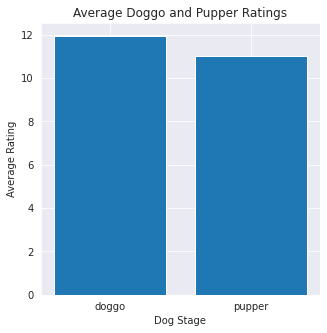

In [105]:
#plot 
x_num = [1, 2] 
y_values = [doggo_avg_rating, pupper_avg_rating] 
x_label = ["doggo", "pupper"] 

plt.figure(figsize = (5,5))
plt.bar(x_num, y_values, tick_label = x_label) 
plt.title("Average Doggo and Pupper Ratings") 
plt.xlabel("Dog Stage") 
plt.ylabel("Average Rating");


The doggo bar is taller than the pupper bar, showing that the average rating received by doggos is higher compared to the average rating received by puppers. 

#### Insight #3: 

Dogs with high ratings generally receive more likes than those with low ratings.

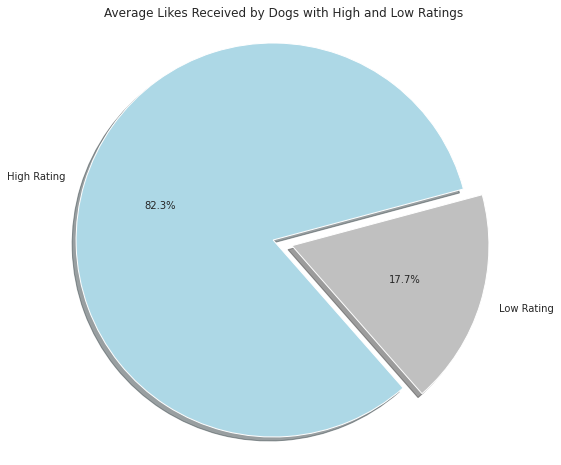

In [106]:
#plot 
values = [avg_high_rating_likes, avg_low_rating_likes]
la_bels = ["High Rating", "Low Rating"]
co_lors = ["lightblue", "silver"] 
ex_plode = (0, 0.1)

plt.figure(figsize = (8,8))    
plt.pie(values, labels = la_bels, autopct = "%1.1f%%", startangle = 15, shadow = True, colors = co_lors, explode = ex_plode)
plt.title("Average Likes Received by Dogs with High and Low Ratings") 
plt.axis("equal");



The slice of the _likes_ pie is larger for dogs that received high ratings compared to those that received low ratings. This shows that dogs with high ratings generally receive more likes than those with low ratings.